### WorkShop: Árbol de Decisión modelo de Clasificación en Scikit-Learn - Titanic

**Resolución**: EDA (Análisis Exploratorio de Datos)

1. Importar las librerías necesarias para la realización del desafío y el dataset propuesto para la ejercitación.

In [ ]:
#Librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Titanic.csv", sep = ",")

2. Imprimir las 5 primeras filas del dataset.

In [ ]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


3. Imprimir las 5 primeras últimas filas del dataset.

In [ ]:
df.tail(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
709,0,3,1,39.0,0,5
710,0,2,0,27.0,0,0
711,1,1,1,19.0,0,0
712,1,1,0,26.0,0,0
713,0,3,0,32.0,0,0


4. Imprimir las dimensiones del dataset.

In [ ]:
df.shape

(714, 6)

5. Obtener la totalidad de registros por columnas

In [ ]:
df.count()

Survived    714
Pclass      714
Sex         714
Age         714
SibSp       714
Parch       714
dtype: int64

6. Analizar el tipo de dato de cada columna

In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
dtype: object

7. Obtener el tipo de estructura del dataset

In [ ]:
type(df)

pandas.core.frame.DataFrame

8. Listar los nombres de las columnas

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

**Resolución**: Machine Learning - Modelo de Clasificación

9.	Separar los features en X e y

In [ ]:
X = df.drop(columns=["Survived"]) #Elimino del dataset la variable a predecir
y = df.Survived #Defino el Target

10. Separar los datos en Train (70 %) y Test (30 %) con un random_state=42.

In [ ]:
from sklearn.model_selection import train_test_split #Libreria para separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #30% para test (validación) y 70% para train (entrenamiento), random 42

11.	Crear un objeto de Árbol de Decisión para un modelo de clasificación, con un Nivel de Profundidad = 2 y una Semilla para la reproducibilidad = 42

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Importo el modelo

tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creo el modelo, prof 2 y semilla 42

12.	Entrenar el modelo creado

In [ ]:
tree.fit(X_train,y_train) #Entreno el modelo

DecisionTreeClassifier(max_depth=2, random_state=42)

13. Realizar la predicción del modelo en Train y Test

In [ ]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

14.	Calcular la métrica de Accuracy en Train y Test 

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8096192384769539
% de aciertos sobre el set de evaluación: 0.786046511627907


15. Graficar las variables de importancia del Árbol de Decisión 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


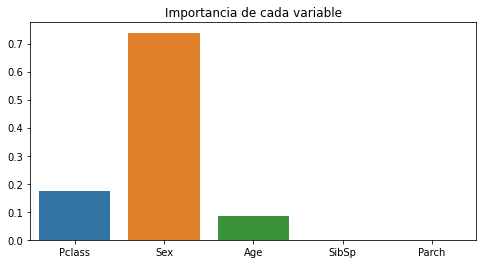

In [ ]:
import seaborn as sns #libreria
plt.figure(figsize=(8,4))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada variable')
plt.show()